<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Josh_Mancuso_DS3_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

In [0]:
#Inspect and clean the data, rename cols, etc

In [3]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [4]:
col_names = {'Occupation': 'genre', 'GoogleKnowlege_Occupation' : 'occupation', 'Year': 'year', 'Show': 'show_date', 'Guest':'guest', 'Group': 'group'}

df = df.rename(columns=col_names)

df['show_date'] = pd.to_datetime(df['show_date'])

df.head()

,year,occupation,show_date,group,guest,genre
0,1999,actor,1999-01-11,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1999-01-12,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1999-01-13,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1999-01-14,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1999-01-18,Acting,David Alan Grier,"Acting, Comedy & Music"


# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [14]:
ct = pd.crosstab(index=df['year'], columns=df['genre'], normalize='index')*100
ct

genre,"Acting, Comedy & Music",Government and Politics,Media,Other
year,,,,
1999,90.361446,1.204819,6.626506,1.807229
2000,73.964497,8.284024,12.426036,5.325444
2001,72.611465,3.821656,19.745223,3.821656
2002,62.264151,6.918239,26.415094,4.402516
2003,56.024096,10.240964,24.698795,9.036145
2004,38.414634,22.560976,27.439024,11.585366
2005,37.037037,16.049383,33.333333,13.580247
2006,36.024845,19.254658,29.192547,15.527950
2007,25.531915,17.021277,33.333333,24.113475


# Part 2 — Recreate this explanatory visualization:

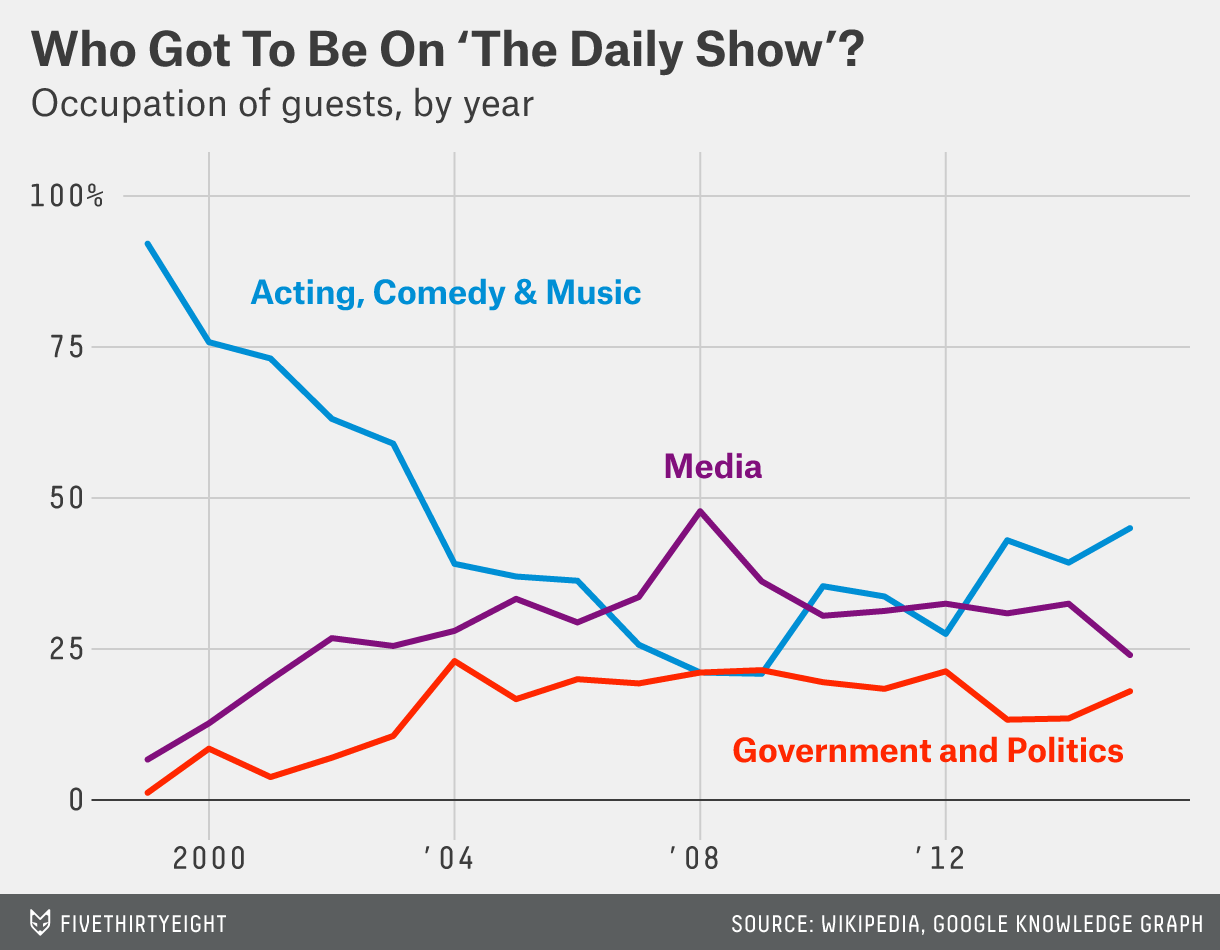

In [8]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [0]:
main_title = "Who Got To Be On 'The Daily Show'?"
subtitle = 'Occupation of guests, by year'
label1= 'Acting, Comedy & Music'
label2 = 'Media'
label3 = 'Government and Politics'

#exclude 'Other' column for 538 graph
ct2 = ct.iloc[:,:3]

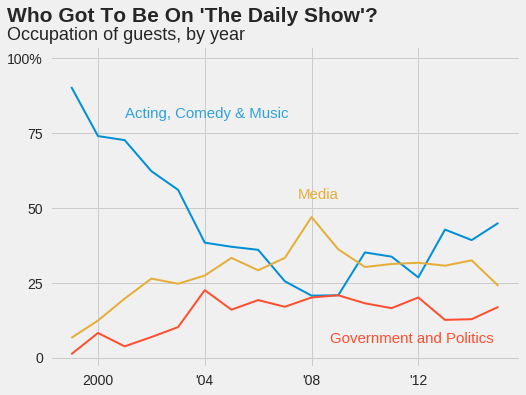

In [10]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(7.5,5.5))
ax.plot(ct2, linewidth=2)
ax.set(ylim=(-3,104))
ax.text(x=2001, y=80, s=label1, fontsize=15, color='#30a2da')
ax.text(x=2007.5, y=53, s=label2, fontsize=15, color='#e5ae38')
ax.text(x=2008.7, y=5, s=label3, fontsize=15, color='#fc4f30')
ax.text(x=1996.6, y=112, s=main_title, fontsize=21, fontweight='bold')
ax.text(x=1996.6, y=106, s=subtitle, fontsize=18)
ax.set_xticklabels(labels=['2000', "'04", "'08", "'12"], fontsize=14)
ax.set_yticklabels(labels=['0', '25', '50', '75', '100%'], fontsize=14)
plt.yticks([0,25,50,75,100])
plt.xticks([2000, 2004, 2008, 2012])
plt.show()

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
top10 = df.guest.value_counts().reset_index().head(10)
top10 = top10.rename(columns={'guest':'count', 'index':'name'})
top10['num'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [0]:
import seaborn as sns

title= "Top 10 Most Frequent Guests on 'The Daily Show'"
ylab = 'Guest Name'
xlab = 'Number of Appearances'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


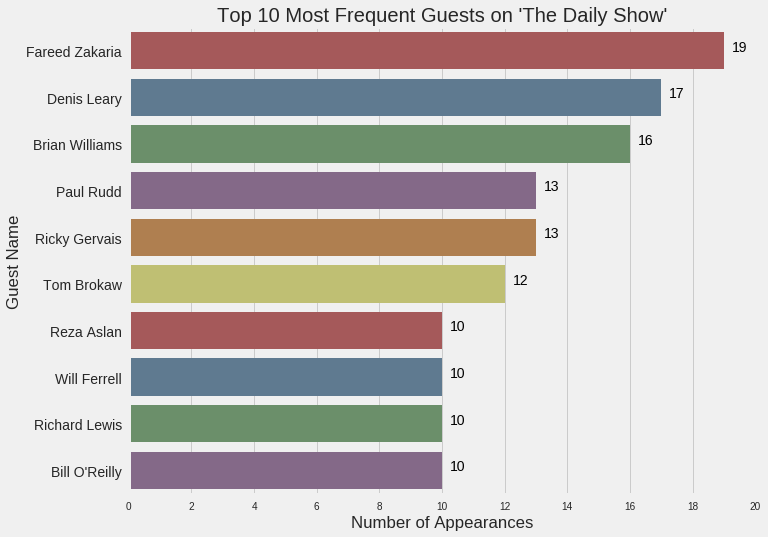

In [13]:
fig = plt.figure(figsize=(10,8))
ax = sns.barplot(x='count', y='num', data=top10, orient='h', palette=sns.color_palette("Set1", n_colors=6, desat=.5))
ax.set(title=title, ylabel=ylab, xlabel=xlab)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
ax.set_yticklabels(labels=top10.name.values, fontsize=14)
for i, row in top10.iterrows():
    ax.text(row[1]+0.25, i, str(row[1]), color='black', fontsize=14)
plt.show()